In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from perceptron_v2 import perceptron

In [3]:
def train_test_split(data, training_ratio=0.7):
    train_sample_size = np.int_(data.shape[0]*training_ratio)
    np.random.shuffle(data)
    #return training_samples, test_samples
    return data[:train_sample_size, :], data[train_sample_size:, :]

# Regression for Univariate data

In [4]:
file = '/Users/raunavghosh/Documents/DeepLearning/Assignments/ProgrammingAssignment1/Group10/Regression/UnivariateData/10.csv'

In [5]:
df = pd.read_csv(file, header=None)
df.head()

,0,1
0,0.718,1.18340
1,0.910,2.62730
2,0.574,0.10786
3,0.086,1.15300
4,0.078,1.06690


In [6]:
data = df.to_numpy(dtype=float, copy=True)
data.shape

(1001, 2)

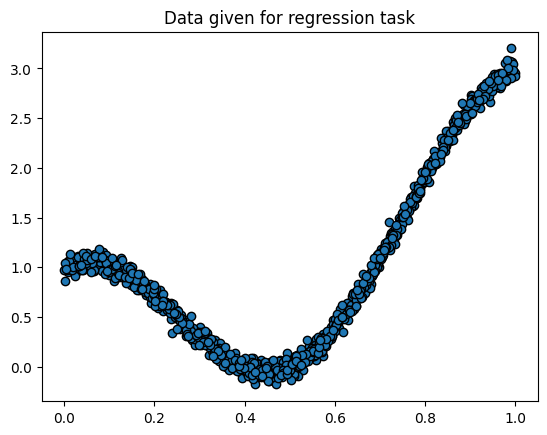

In [7]:
plt.scatter(data[:, 0], data[:, 1], edgecolors='black')
plt.title('Data given for regression task')
plt.show()

In [8]:
train_data, test_data = train_test_split(data)
train_data.shape, test_data.shape

((700, 2), (301, 2))

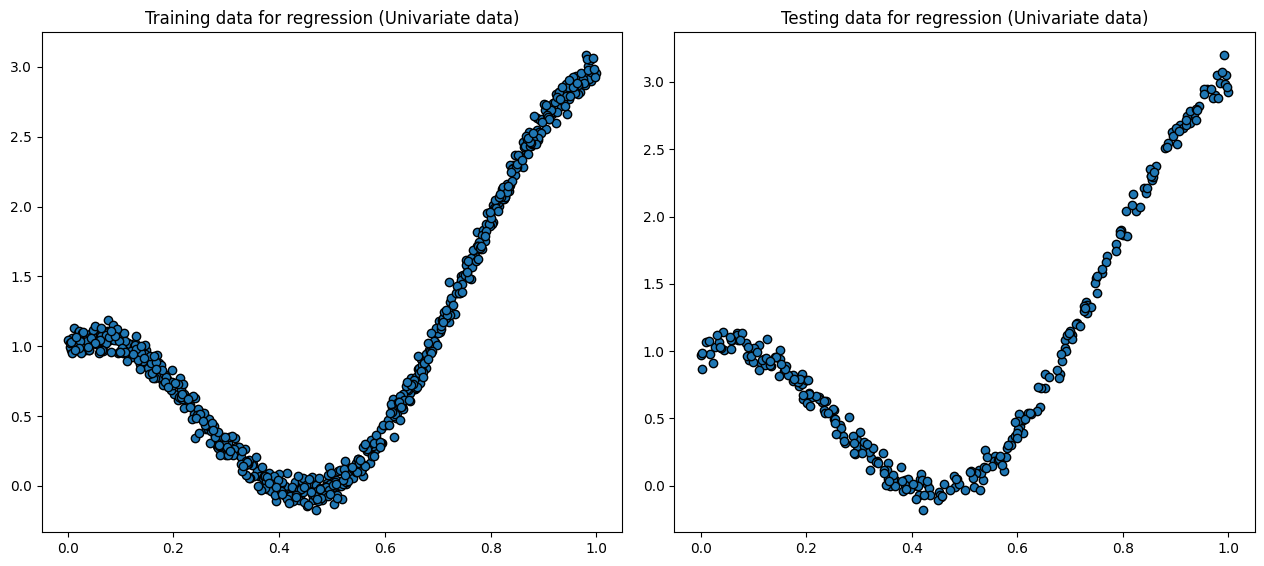

In [9]:
plt.subplot(1,2,1)
plt.scatter(train_data[:, 0], train_data[:, 1], edgecolors='black')
plt.title('Training data for regression (Univariate data)')

plt.subplot(1,2,2)
plt.scatter(test_data[:, 0], test_data[:, 1], edgecolors='black')
plt.title('Testing data for regression (Univariate data)')
plt.tight_layout(rect=[0, 0, 2, 1.2])
plt.show()

# Building the Regressor

In [26]:
neta = 0.005
regressor = perceptron(n_features=1, activation='linear', learning_rate=neta, max_epoch=100)
epoch_err = regressor.fit_regression(train_data)

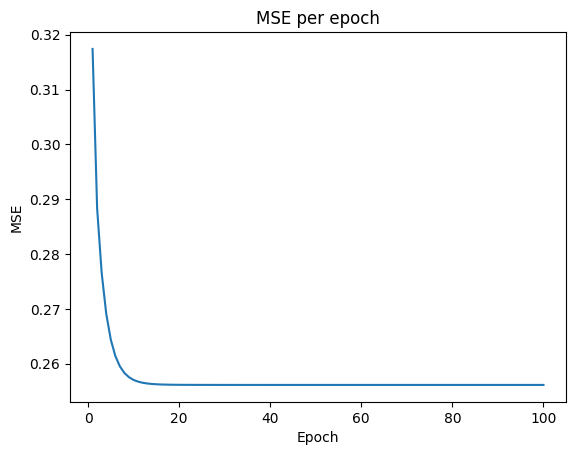

In [27]:
plt.figure()
plt.title("MSE per epoch")
plt.plot(range(1, len(epoch_err)+1), epoch_err)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [28]:
pred = []
for x in train_data[:, 0]:
    pred.append(regressor.predict_regress([x]))

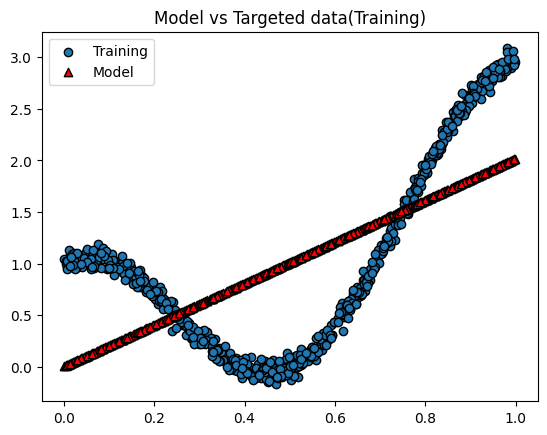

In [29]:
plt.scatter(train_data[:, 0], train_data[:, 1], label='Training', edgecolors='black')
# plt.title('Training data for regression (Univariate data)')
plt.scatter(train_data[:, 0], pred, label='Model', color='red', edgecolors='black', marker='^')
plt.title('Model vs Targeted data(Training)')
plt.legend()
plt.show()

## Testing

In [30]:
true_output = test_data[:, -1:]
pred_output = []
for point in test_data[:, :-1].reshape((-1, 1)):
    pred_output.append(regressor.predict_regress(point))

In [31]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(true_output, pred_output)
mse_test

0.4879046866552975

In [32]:
train_output = train_data[:, -1:]
learned_output = [regressor.predict_regress(point) for point in train_data[:, :-1].reshape((-1, 1))]
mse_train = mean_squared_error(train_output, learned_output)
mse_train

0.5091422430436592

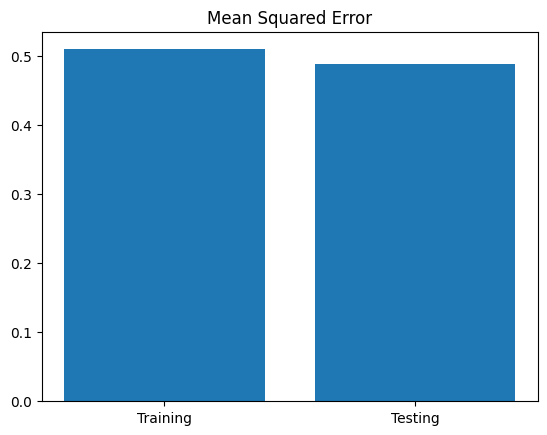

In [33]:
plt.bar(['Training', 'Testing'], [mse_train, mse_test])
plt.title('Mean Squared Error')
plt.show()